In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns

import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import joblib
import warnings
warnings.simplefilter('ignore')
import os
def rollCollective(district,case='Confirmed'):
    ts=df.loc[(df['District']==district)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Confirmed']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlotCollective(district, case='Confirmed'):
    ts=df.loc[(df['District']==district)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['Confirmed']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %district)
    plt.xticks([])
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
def mape(y2, y_pred): 
    y2, y_pred = np.array(y2), np.array(y_pred)
    return np.mean(np.abs((y2 - y_pred) / y2)) * 100
def plotResults(pred,testtemp):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(16,6))
    figure,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(testtemp, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')

In [2]:
list = ['Date', 'State', 'District', 'Confirmed']
df=pd.read_csv('output.csv',usecols=list)

In [3]:
df['Date']=pd.to_datetime(df['Date'])

In [4]:
state_dist=set(zip(df['State'],df['District']))
state_dist


{('Andhra Pradesh', 'Anantapur'),
 ('Andhra Pradesh', 'Chittoor'),
 ('Andhra Pradesh', 'East Godavari'),
 ('Andhra Pradesh', 'Guntur'),
 ('Andhra Pradesh', 'Krishna'),
 ('Andhra Pradesh', 'Kurnool'),
 ('Andhra Pradesh', 'Prakasam'),
 ('Andhra Pradesh', 'Srikakulam'),
 ('Andhra Pradesh', 'Visakhapatnam'),
 ('Andhra Pradesh', 'Vizianagaram'),
 ('Andhra Pradesh', 'West Godavari'),
 ('Arunachal Pradesh', 'Anjaw'),
 ('Arunachal Pradesh', 'Changlang'),
 ('Arunachal Pradesh', 'Dibang Valley'),
 ('Arunachal Pradesh', 'East Kameng'),
 ('Arunachal Pradesh', 'East Siang'),
 ('Arunachal Pradesh', 'Kurung Kumey'),
 ('Arunachal Pradesh', 'Lohit'),
 ('Arunachal Pradesh', 'Lower Dibang Valley'),
 ('Arunachal Pradesh', 'Lower Subansiri'),
 ('Arunachal Pradesh', 'Papum Pare'),
 ('Arunachal Pradesh', 'Tawang'),
 ('Arunachal Pradesh', 'Tirap'),
 ('Arunachal Pradesh', 'Upper Siang'),
 ('Arunachal Pradesh', 'Upper Subansiri'),
 ('Arunachal Pradesh', 'West Kameng'),
 ('Arunachal Pradesh', 'West Siang'),
 ('B

MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error
MAPE error

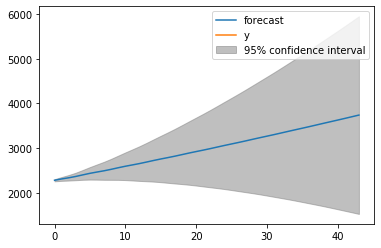

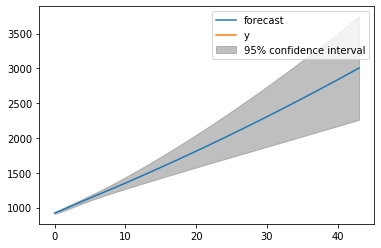

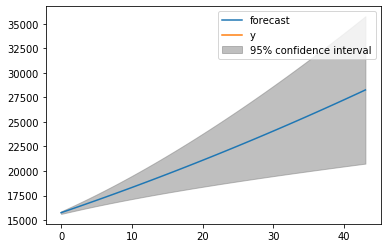

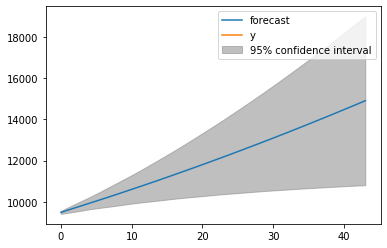

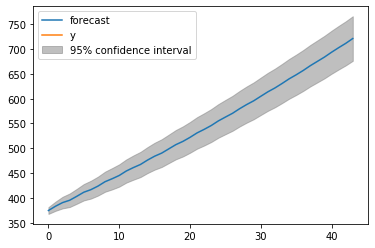

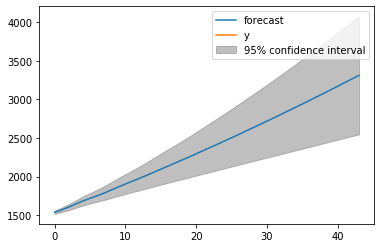

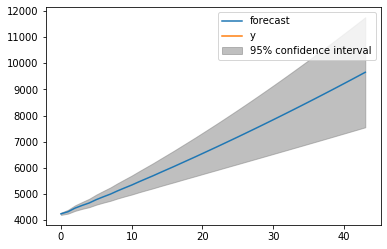

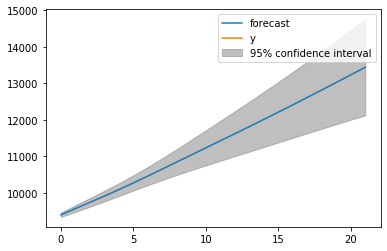

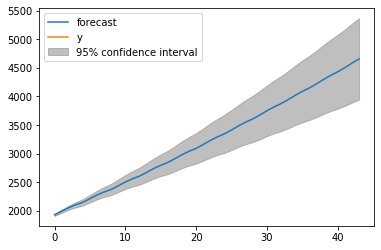

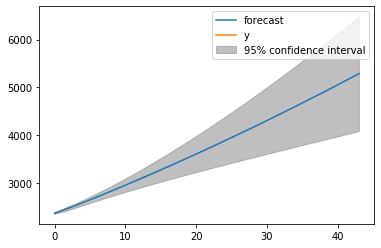

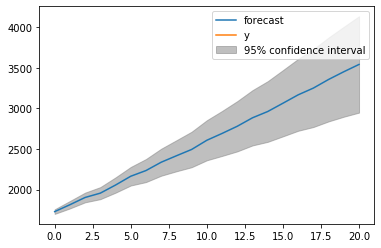

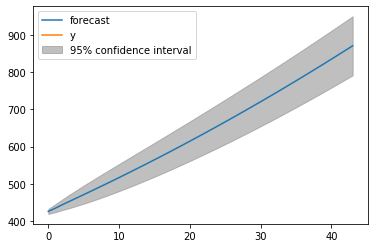

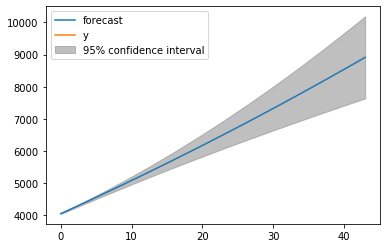

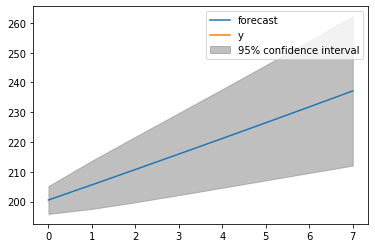

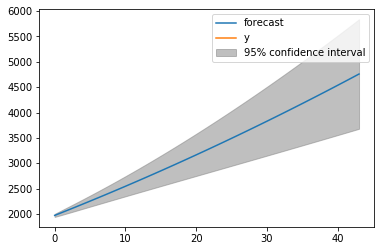

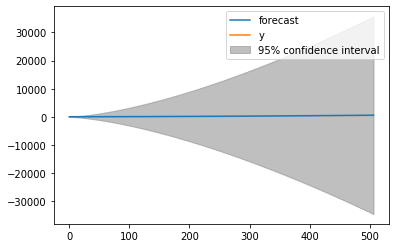

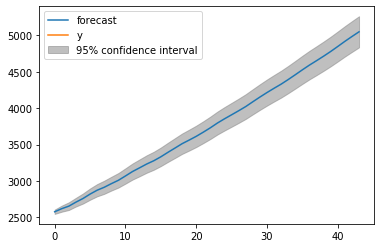

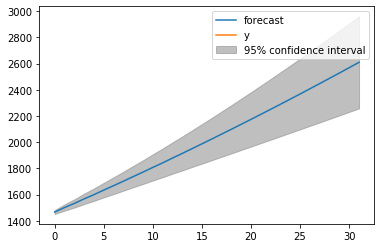

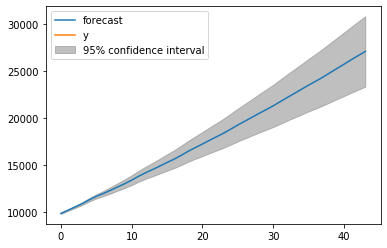

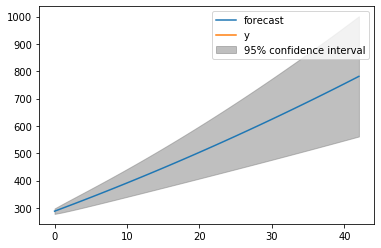

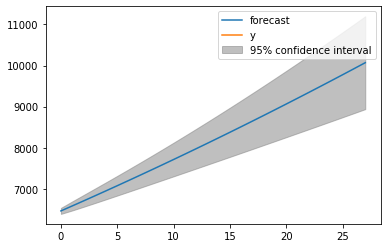

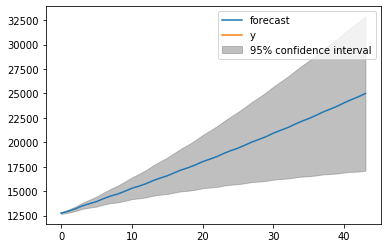

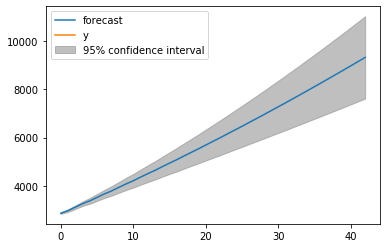

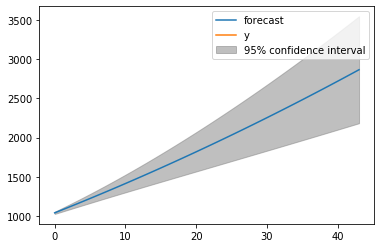

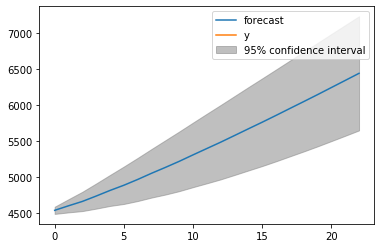

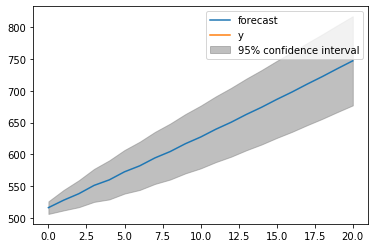

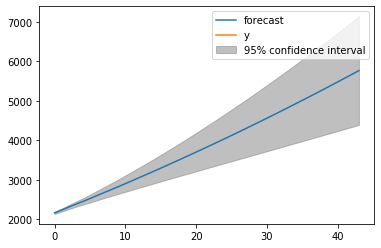

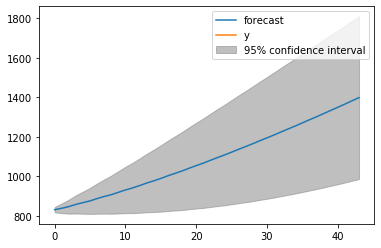

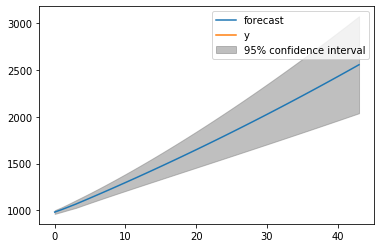

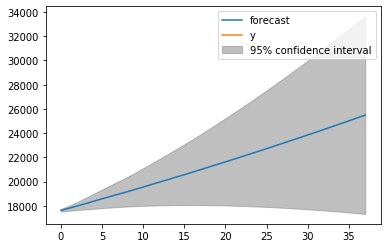

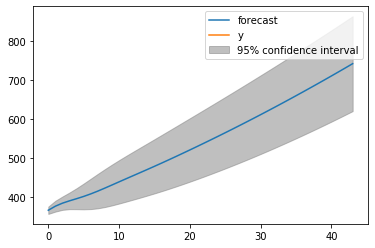

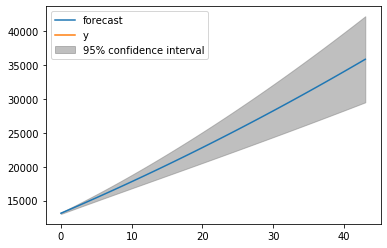

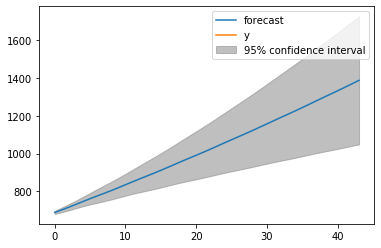

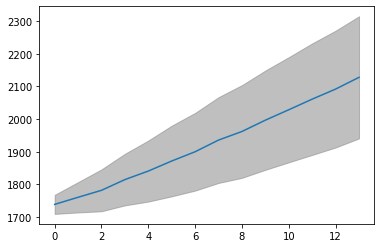

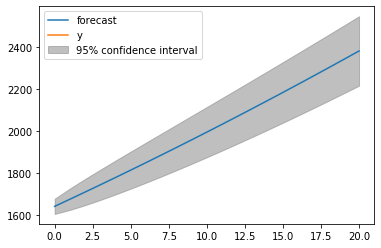

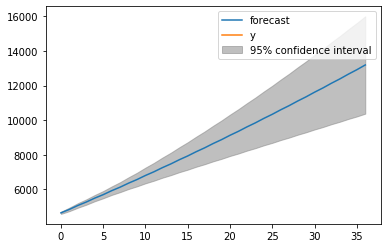

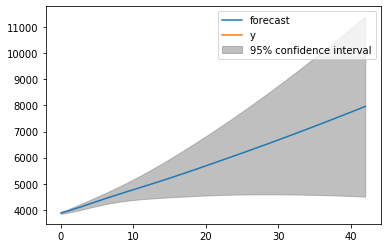

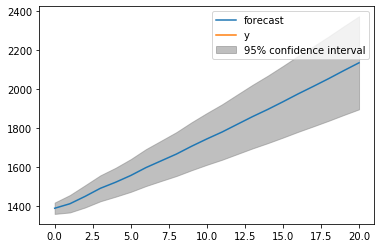

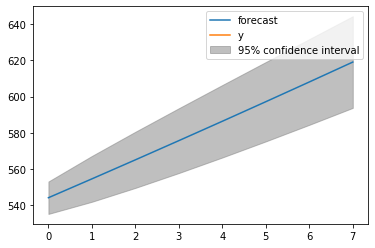

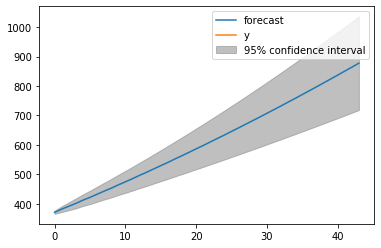

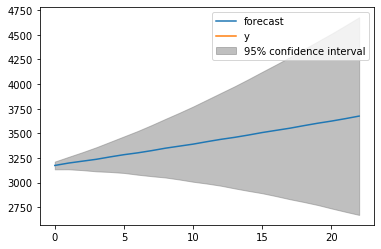

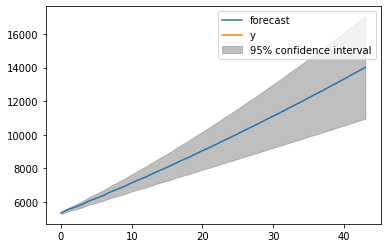

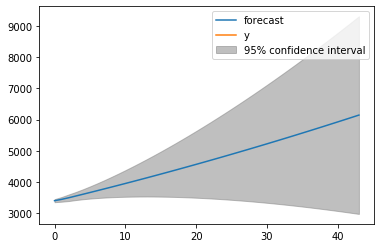

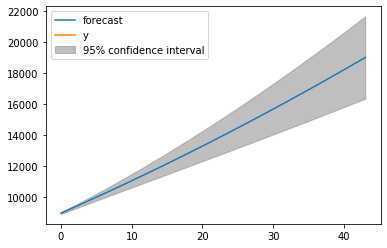

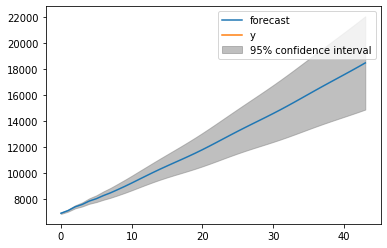

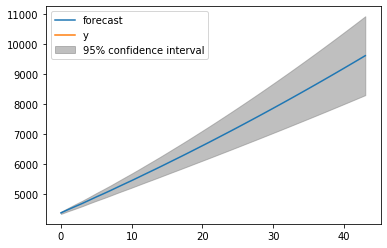

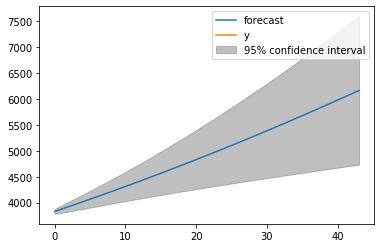

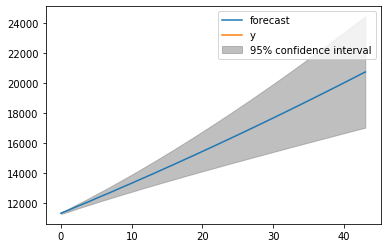

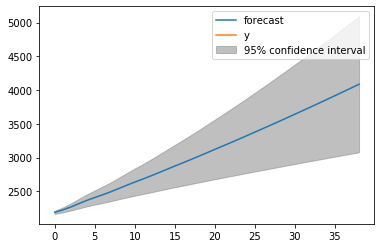

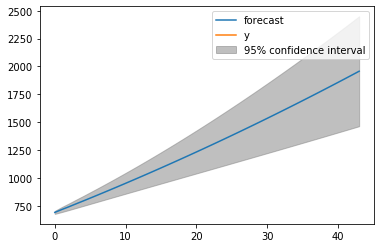

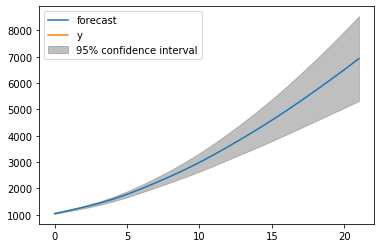

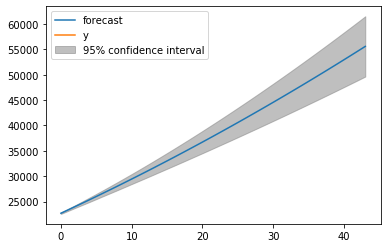

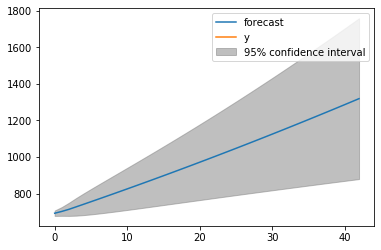

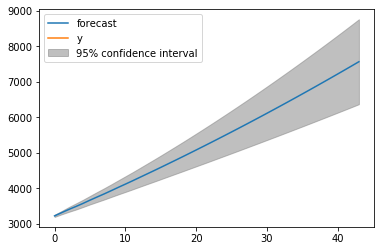

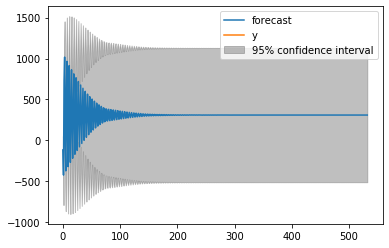

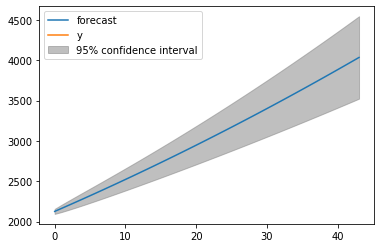

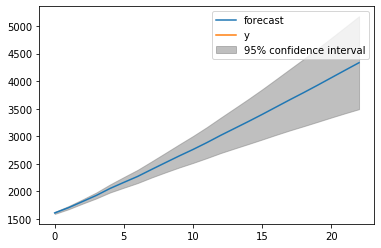

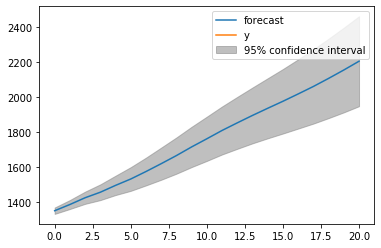

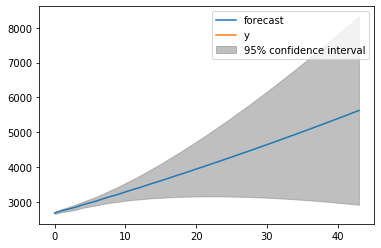

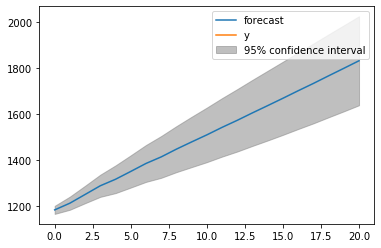

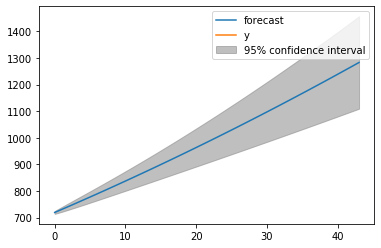

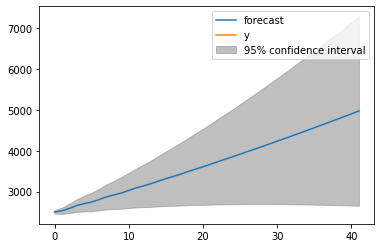

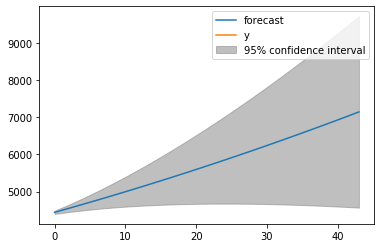

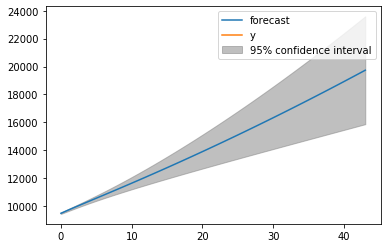

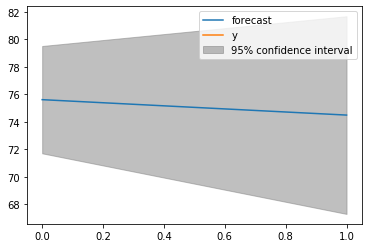

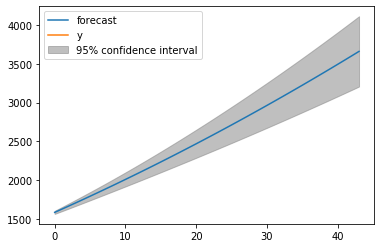

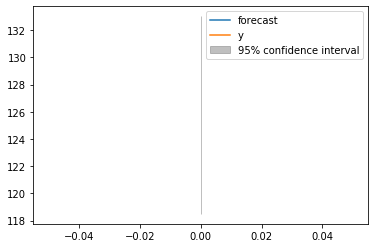

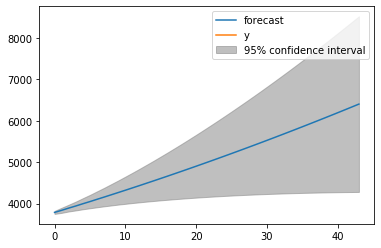

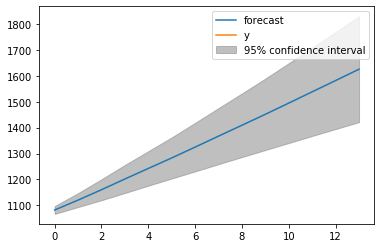

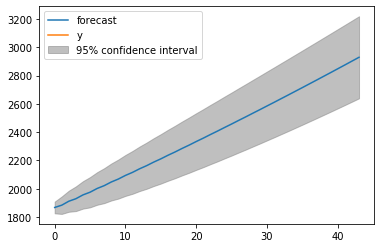

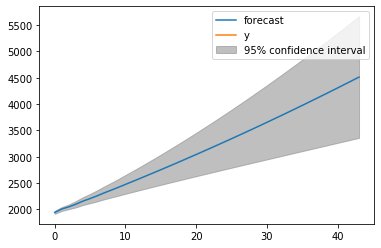

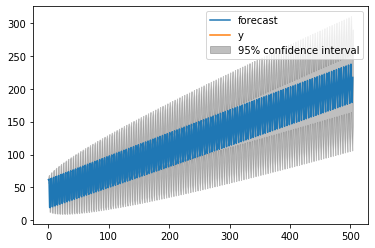

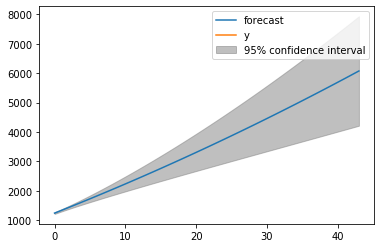

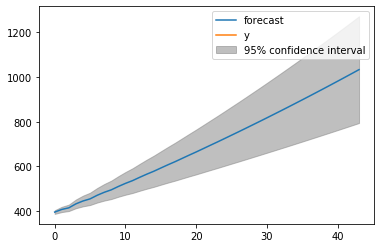

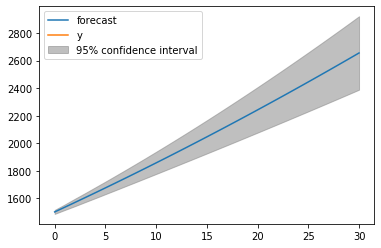

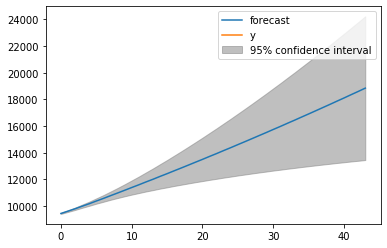

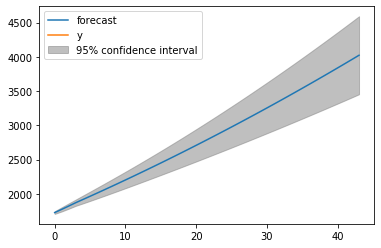

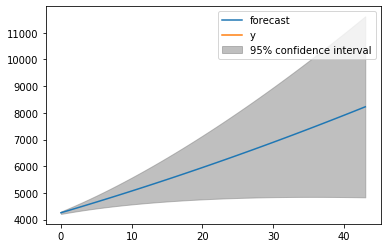

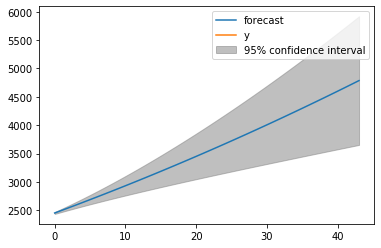

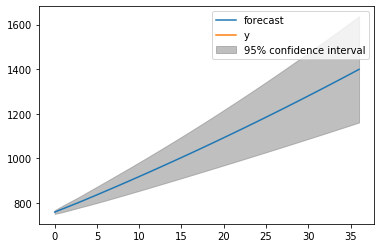

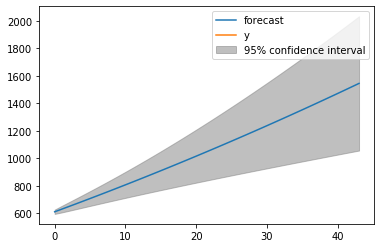

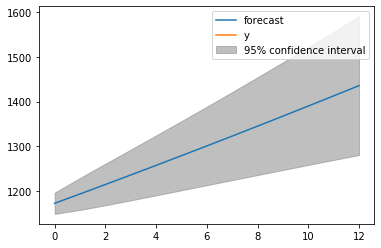

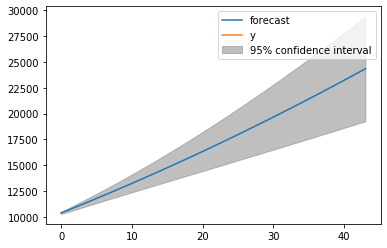

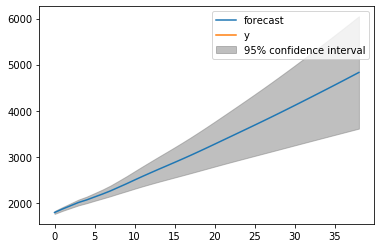

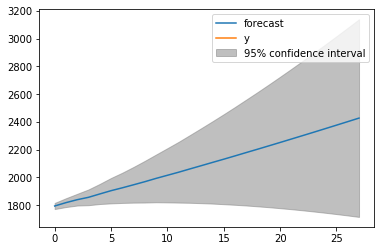

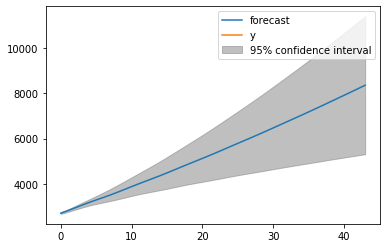

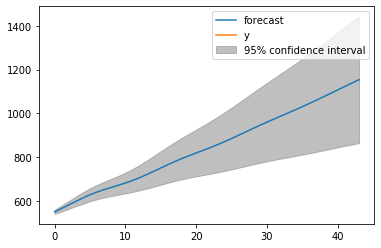

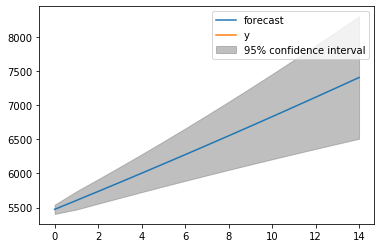

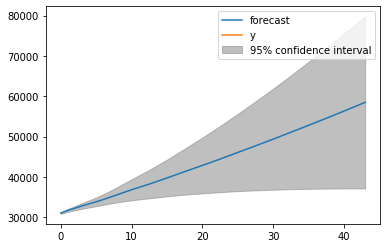

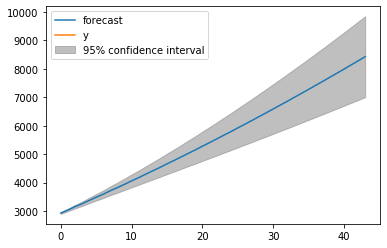

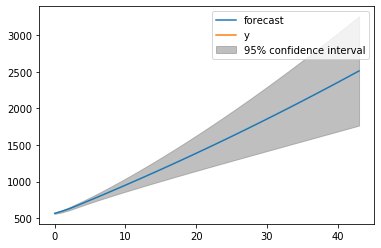

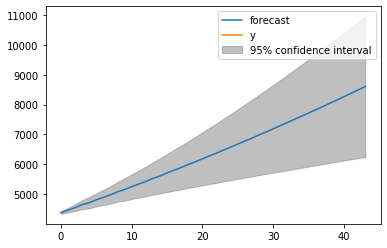

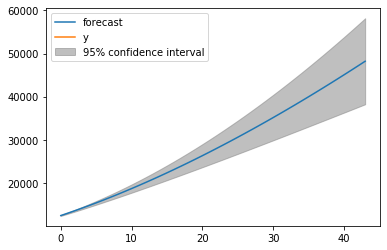

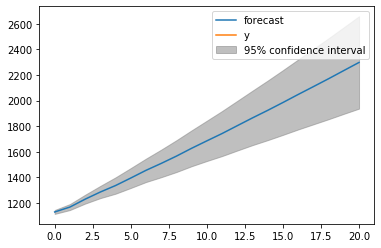

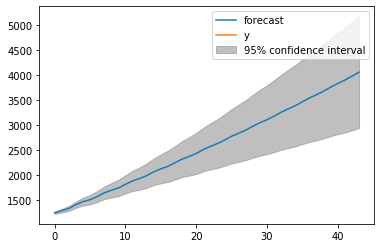

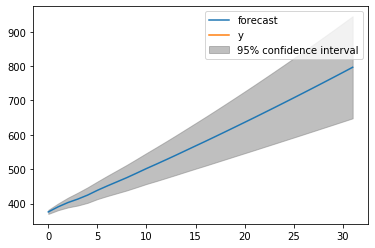

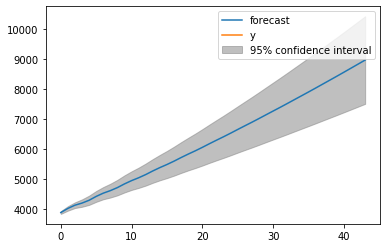

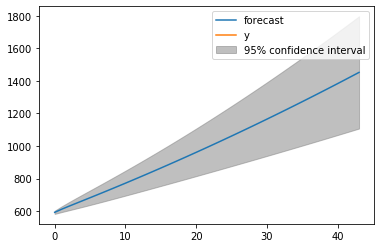

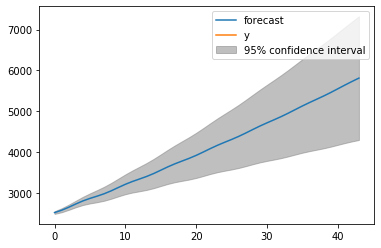

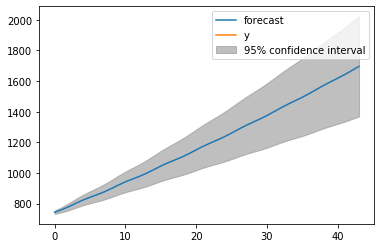

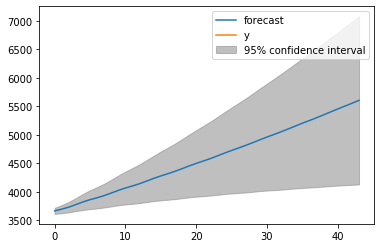

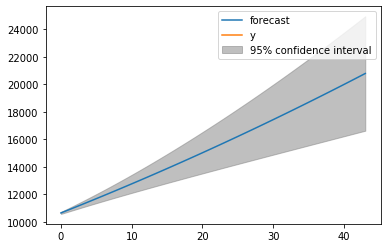

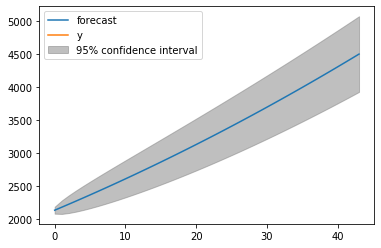

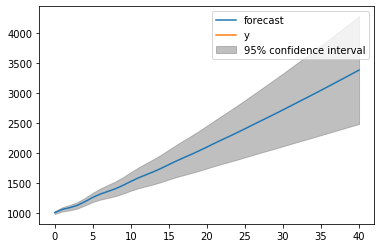

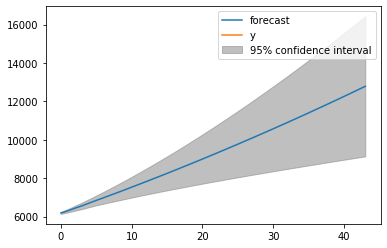

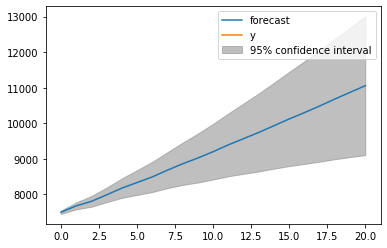

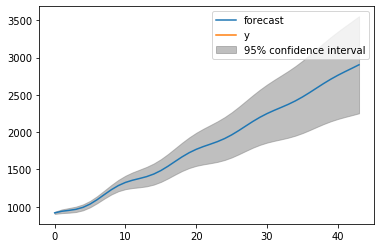

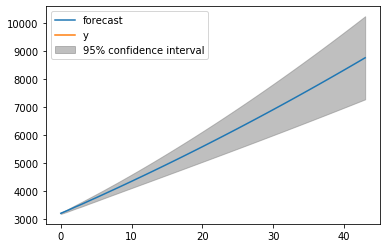

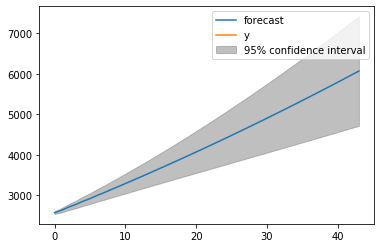

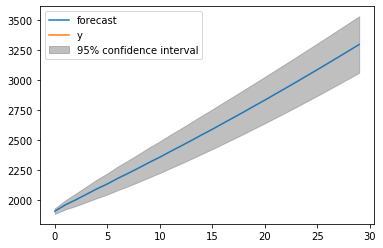

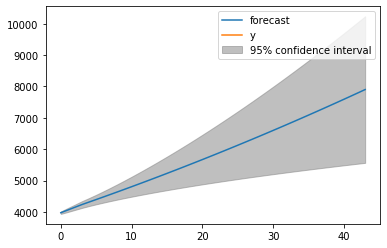

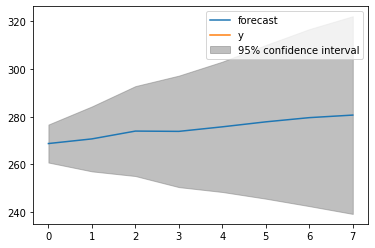

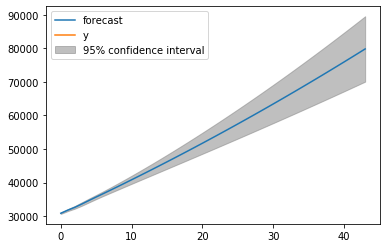

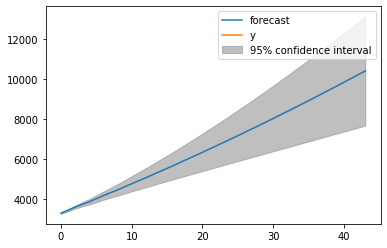

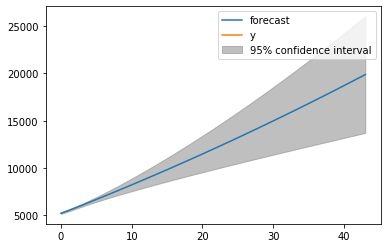

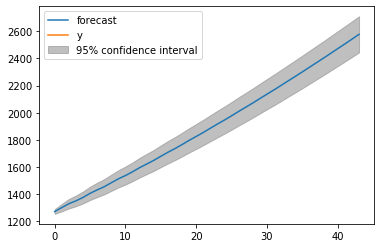

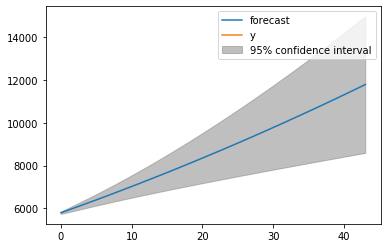

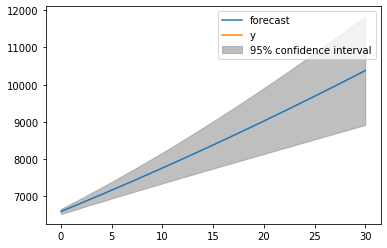

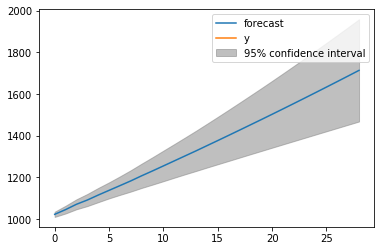

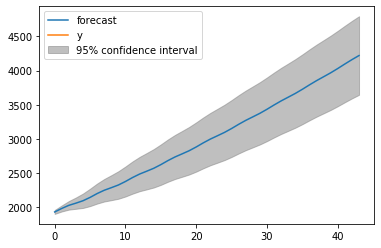

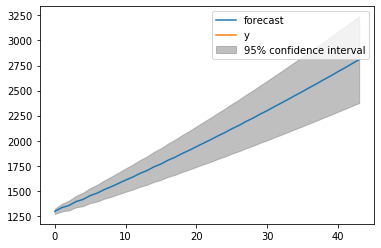

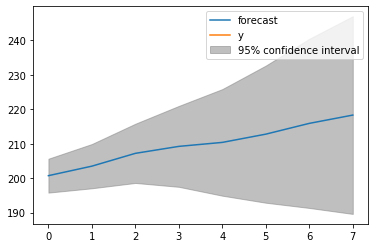

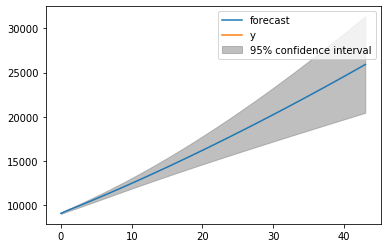

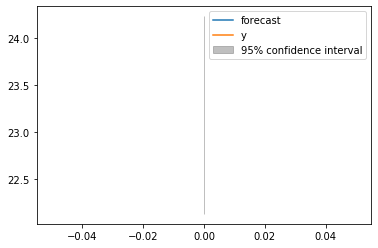

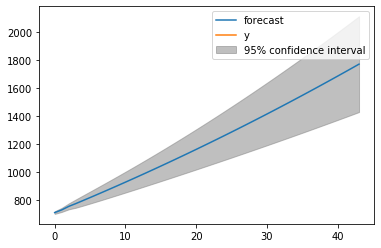

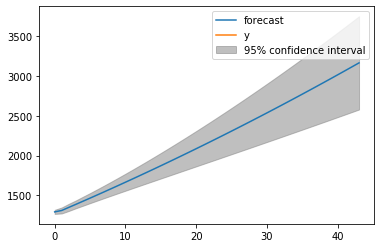

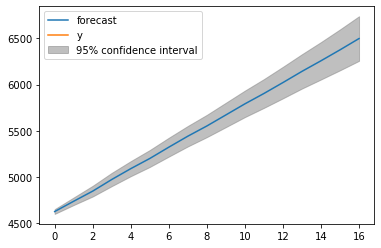

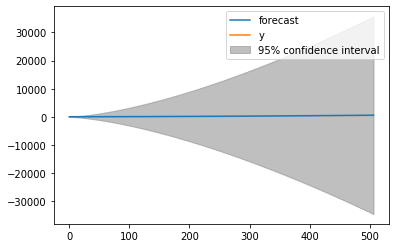

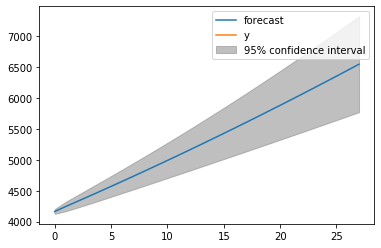

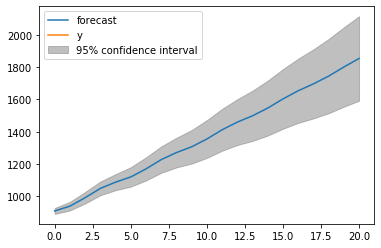

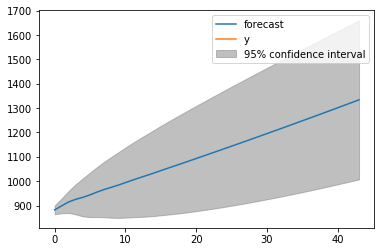

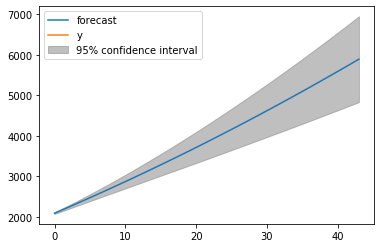

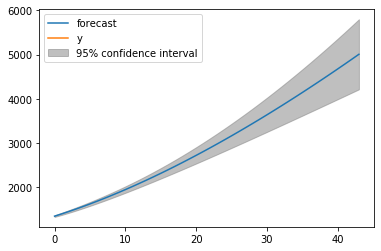

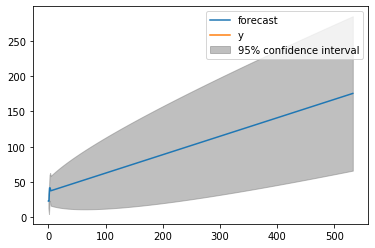

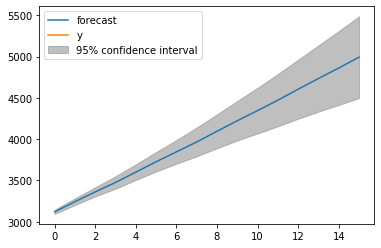

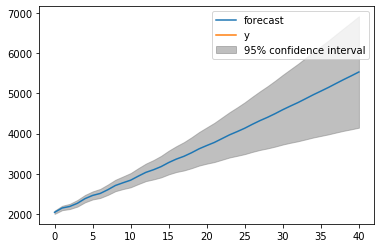

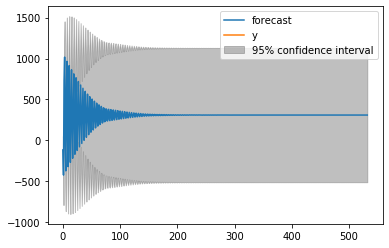

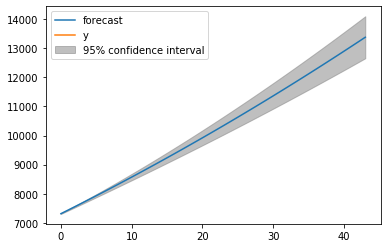

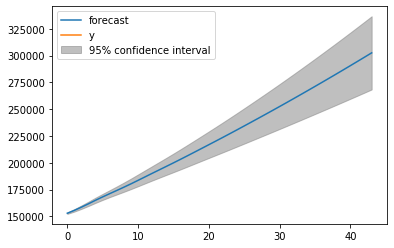

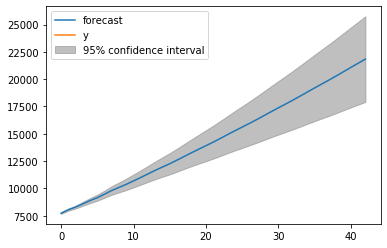

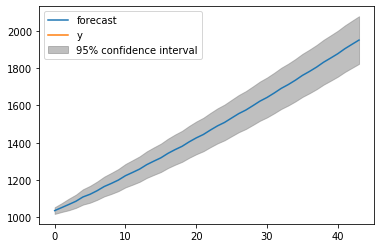

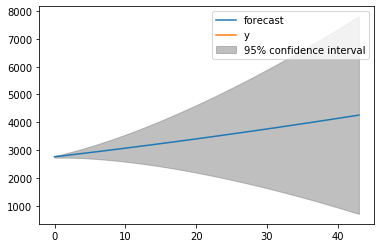

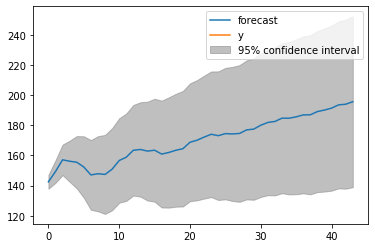

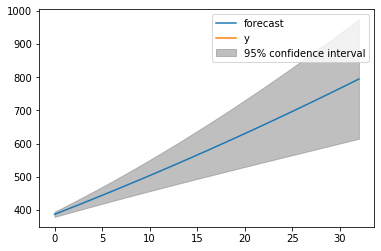

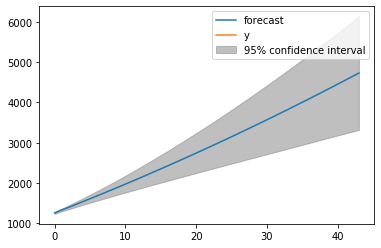

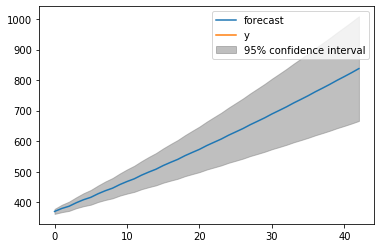

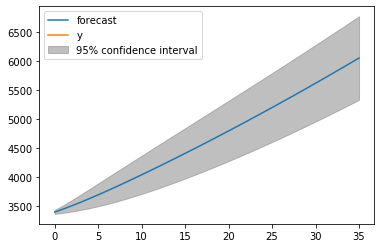

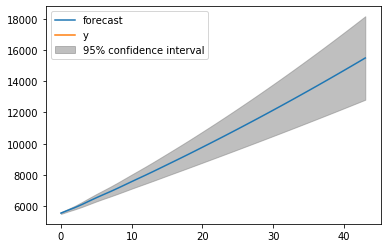

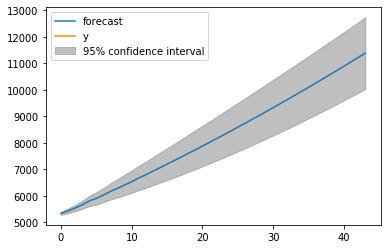

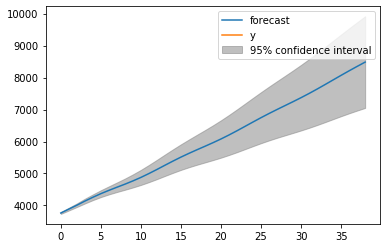

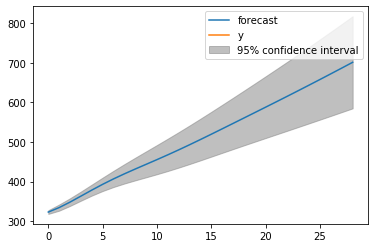

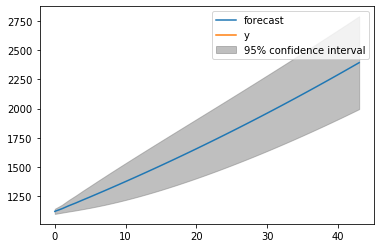

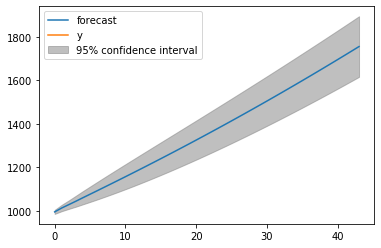

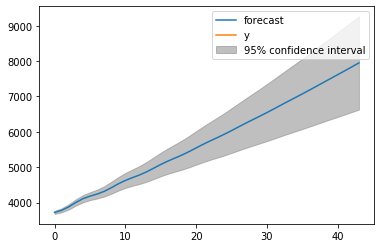

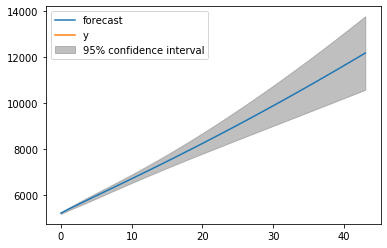

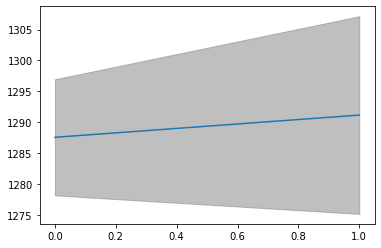

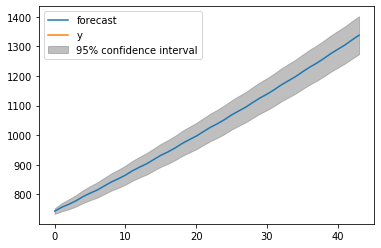

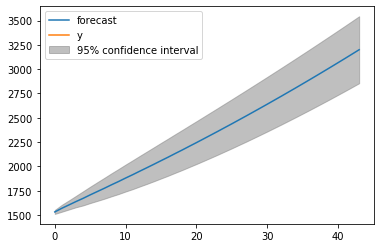

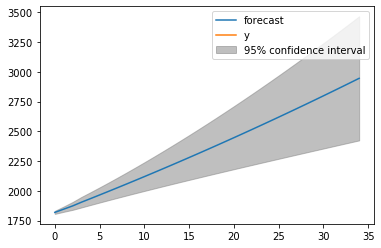

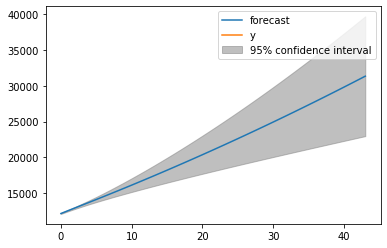

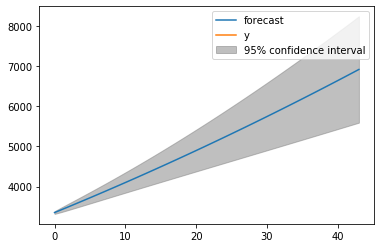

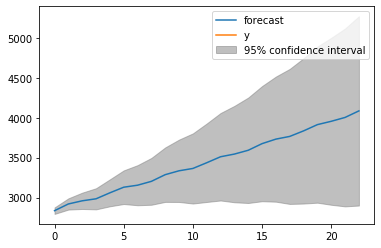

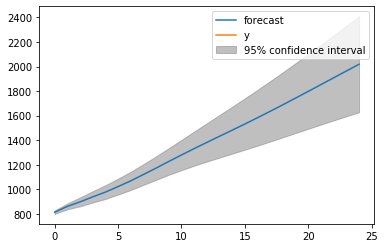

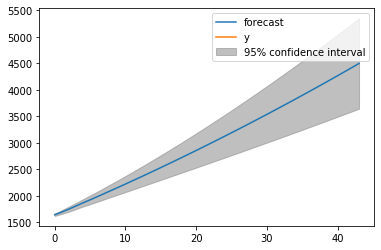

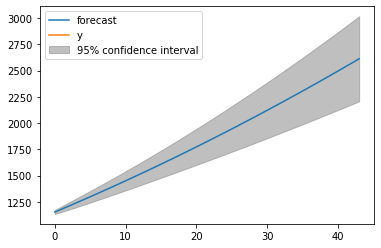

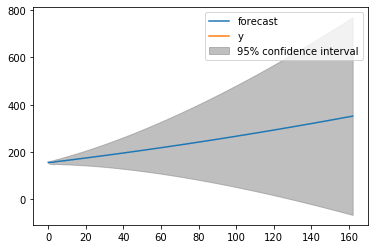

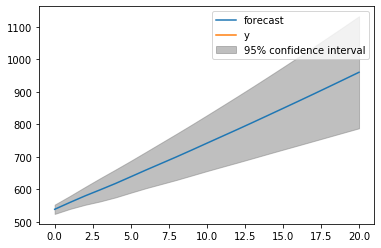

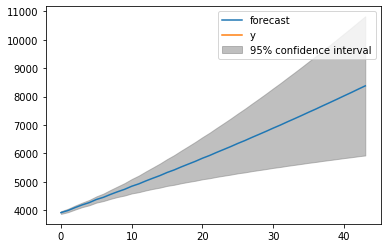

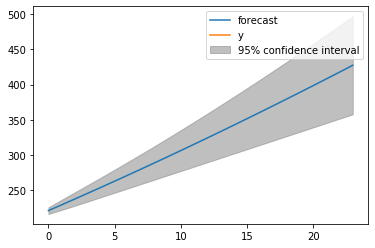

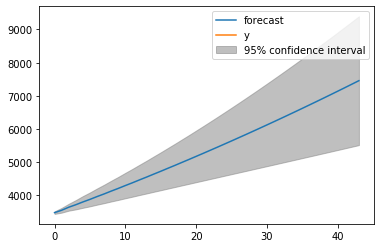

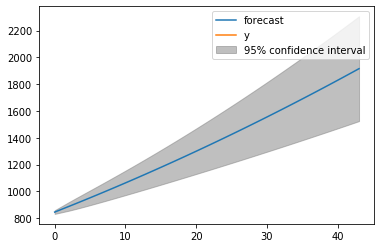

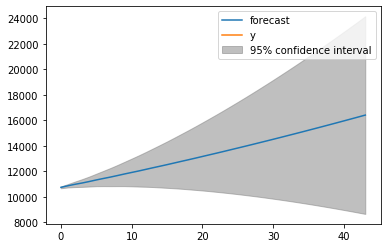

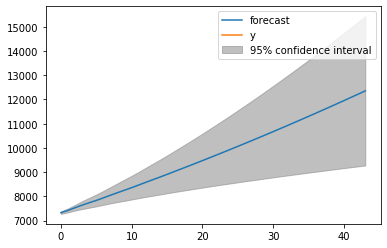

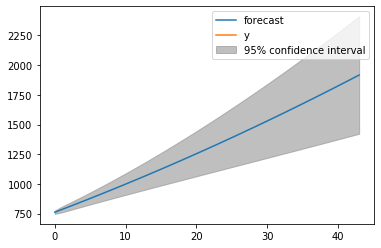

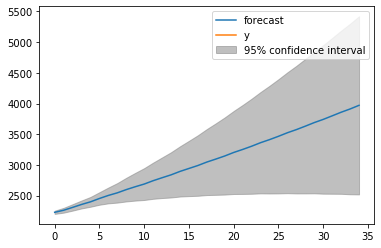

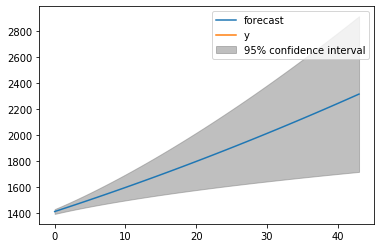

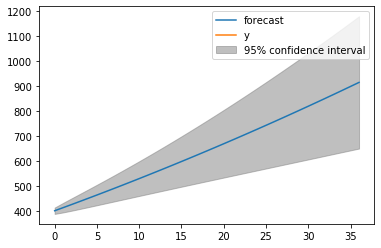

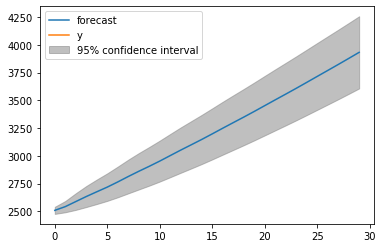

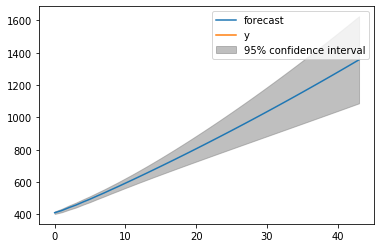

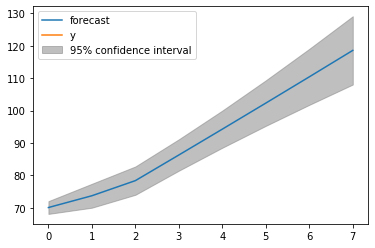

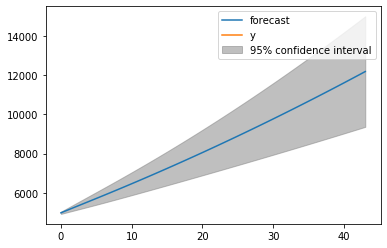

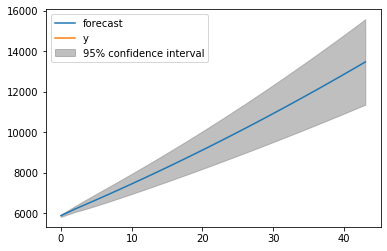

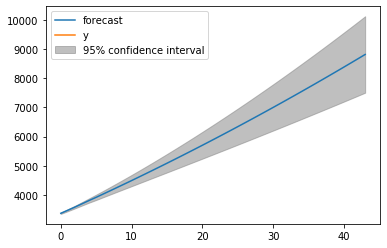

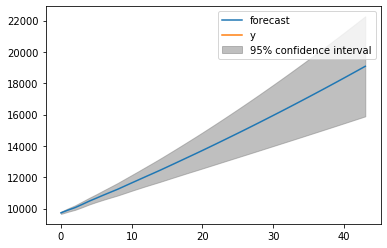

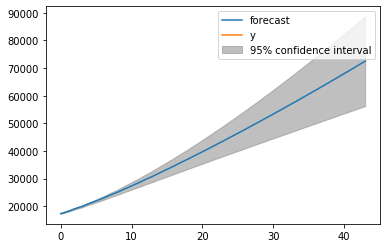

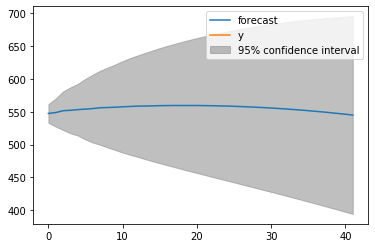

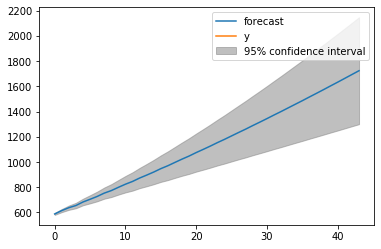

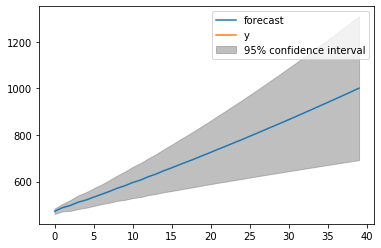

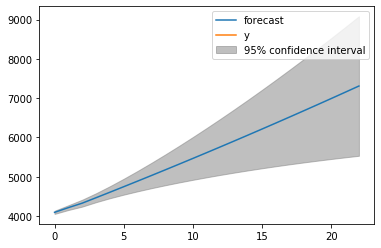

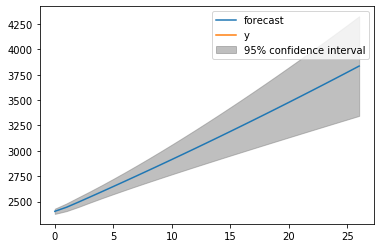

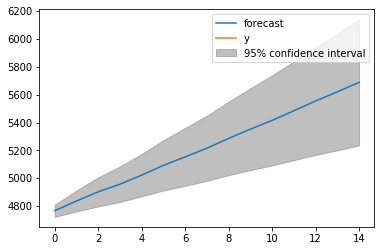

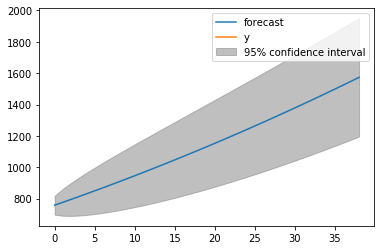

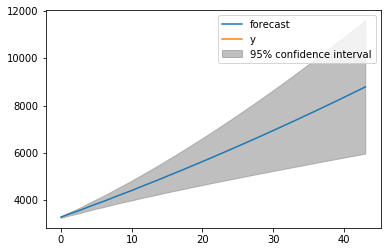

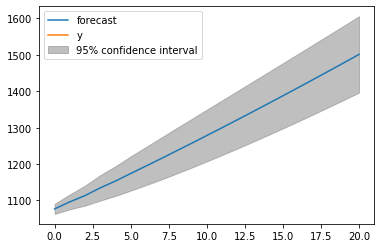

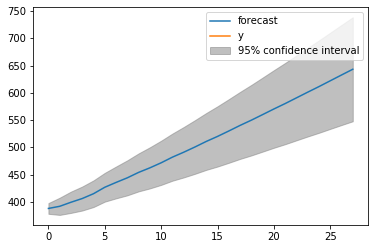

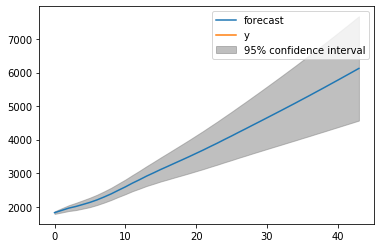

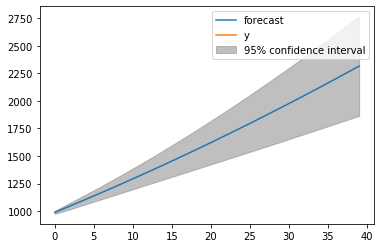

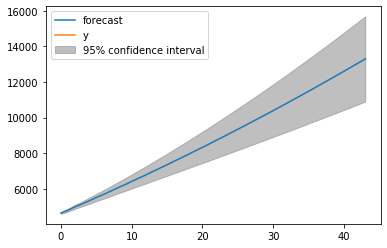

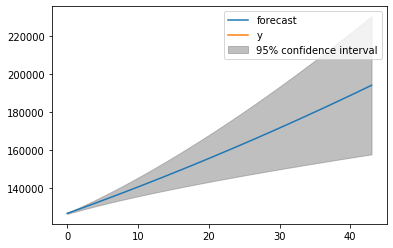

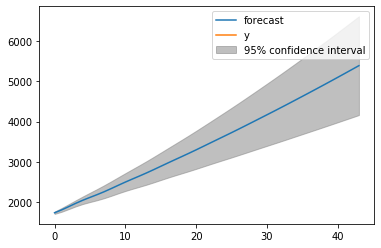

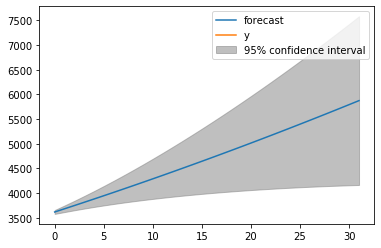

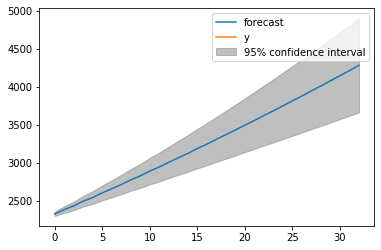

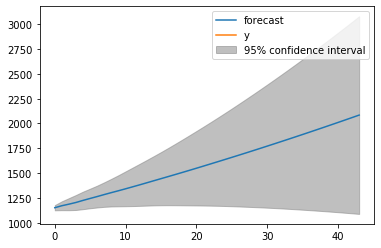

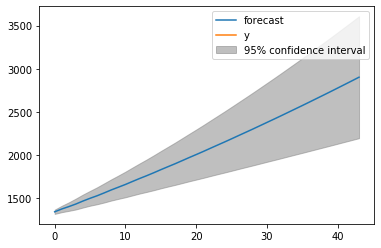

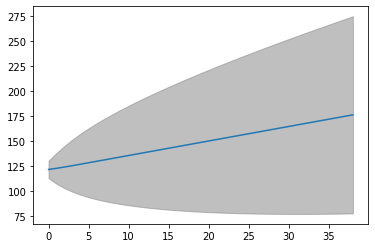

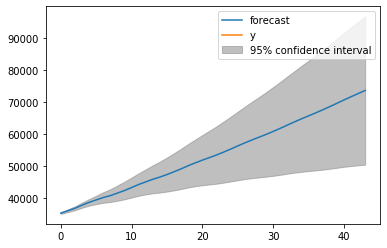

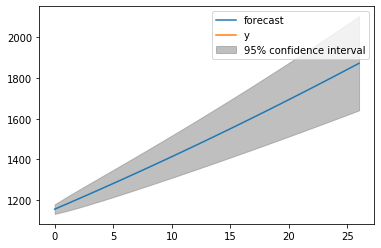

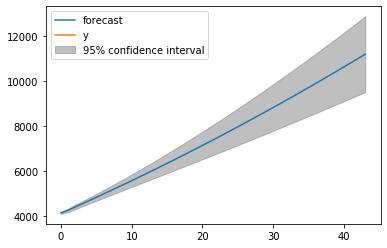

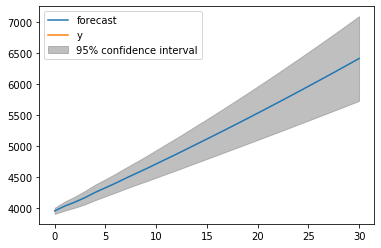

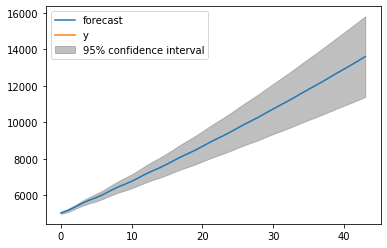

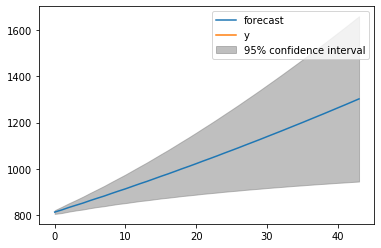

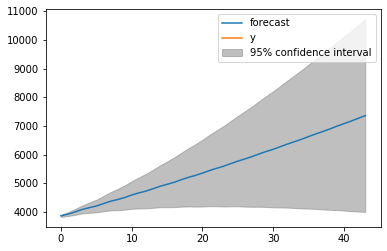

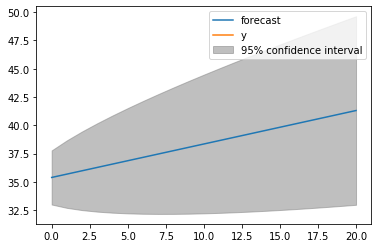

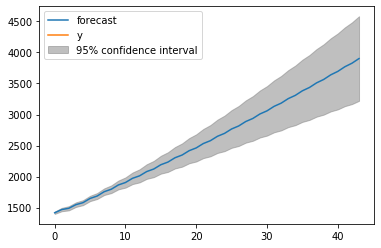

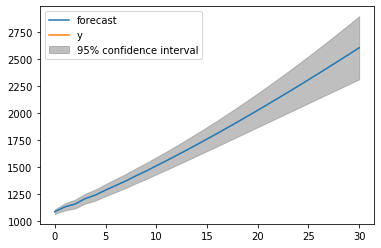

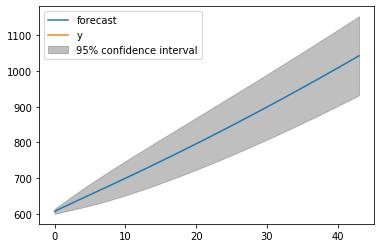

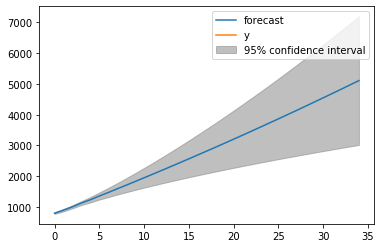

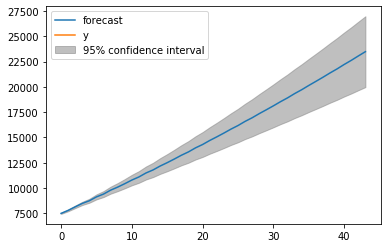

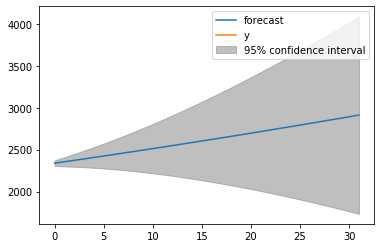

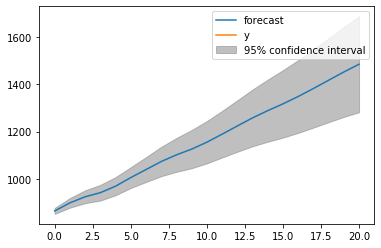

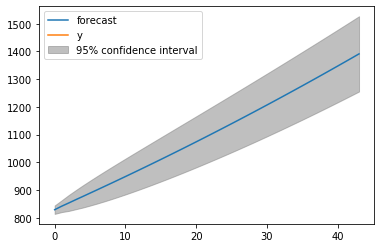

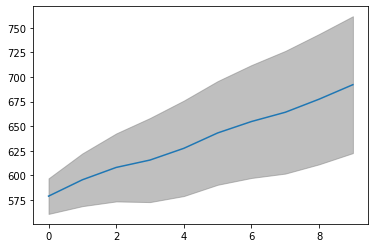

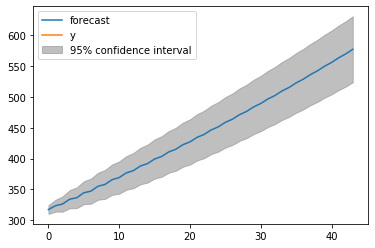

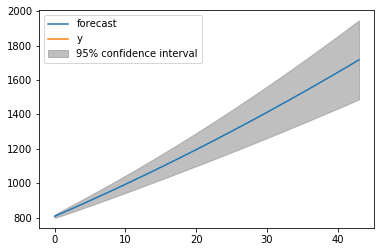

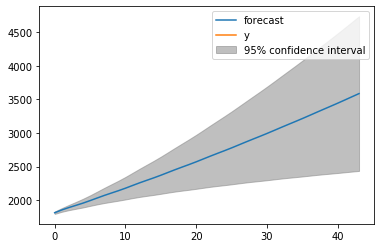

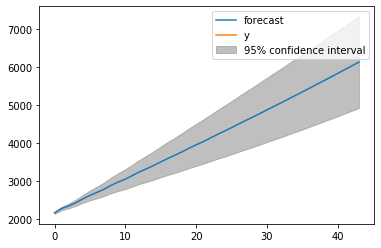

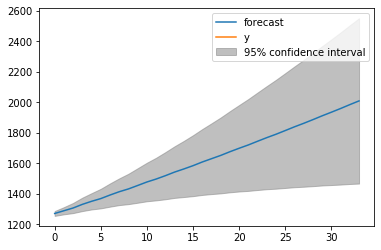

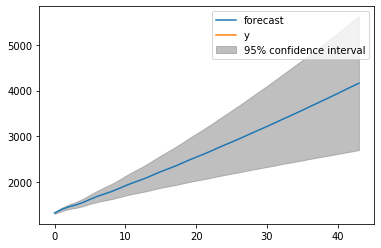

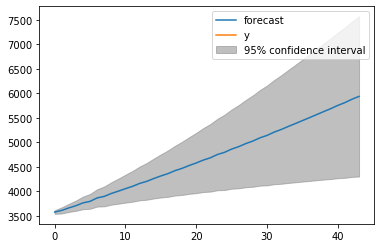

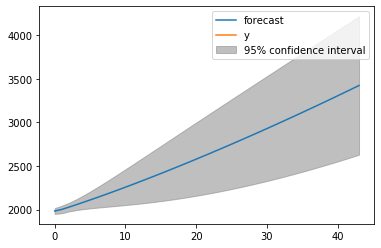

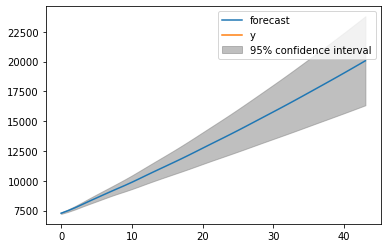

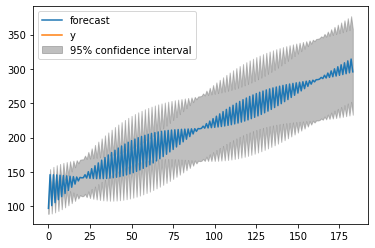

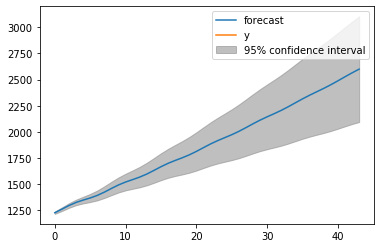

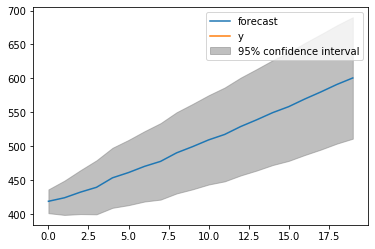

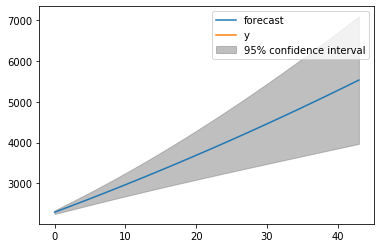

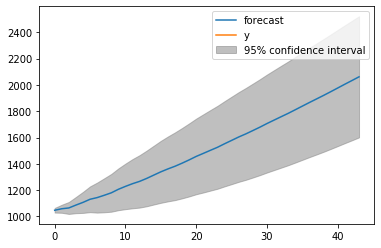

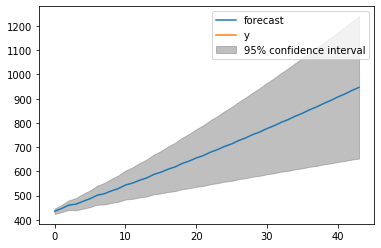

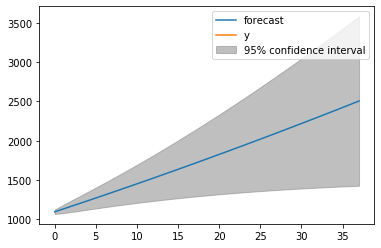

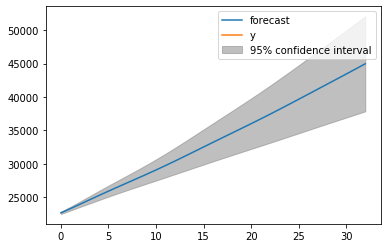

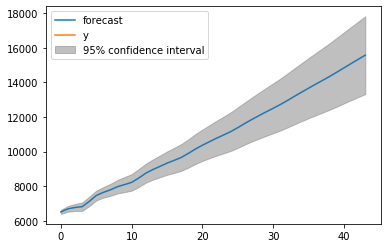

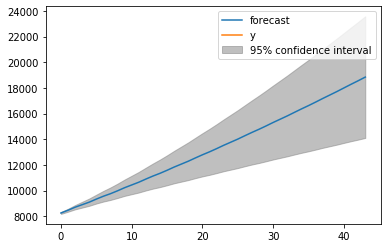

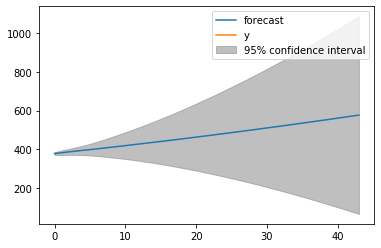

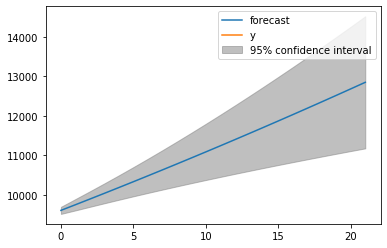

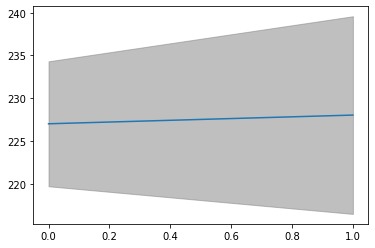

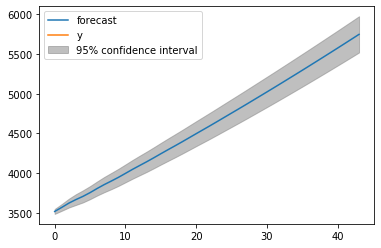

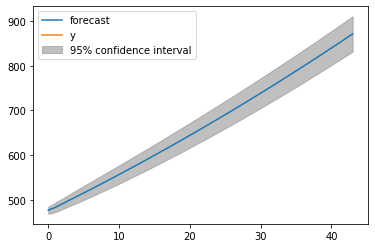

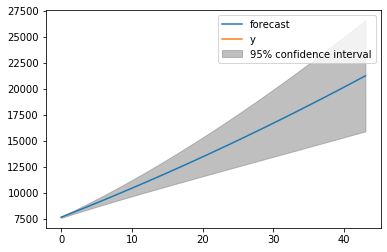

In [9]:
Mapescoredf=pd.DataFrame(columns=['State','District','MapeScore arima','MapeScore var','MapeScore poly'])
i=0
for (st,dis) in state_dist:
    dftemp=df[df['District']==dis]
    test=dftemp[120:]
    test = test.set_index(['Date'])
    testtemp=test['Confirmed'].values

    modelname="arimamodel_for_state_"+st+"_district_"+dis
    try:
        model=joblib.load(modelname).fit()
#         print('Arima summary')
#         print(model.summary())
#         print('Plot predict')
        model.plot_predict(start=120, end=120+len(test))
        pred=model.forecast(steps=len(test))[0]
#         print('true vs predicted values')
#         plotResults(pred,testtemp)
        test['Predicted']=pred[:len(test)]
#         print(test)
        print('MAPE error')

        vl=mape(testtemp,pred[:len(test)])
        Mapescoredf=Mapescoredf.append(pd.DataFrame(data=[[st,dis,vl]],columns=['State','District','MapeScore arima']),ignore_index=True)    
    except:
        continue
   

In [23]:
Mapescoredf

State         District  MapeScore arima MapeScore var  \
0               Bihar           Munger        11.362465            34   
1              Punjab  Fatehgarh Sahib        25.650701           NaN   
2          Tamil Nadu     Kancheepuram         9.737995           NaN   
3          Tamil Nadu   Tiruvannamalai         7.140038           NaN   
4    Himachal Pradesh              Una        32.375766           NaN   
..                ...              ...              ...           ...   
466    Madhya Pradesh        Tikamgarh        18.328711           NaN   
467         Karnataka          Raichur         2.971600           NaN   
468       Maharashtra            Akola        14.479449           NaN   
469         Rajasthan            Dausa        12.545968           NaN   
470      Chhattisgarh           Raipur        32.805058           NaN   

    MapeScore poly  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
..             ...  
466            NaN  
467            NaN  
468            NaN  
469            NaN  
470            NaN  

[471 rows x 5 columns]

In [20]:
pd.read_csv('Mapescoreinfo', index_col=None)

Unnamed: 0             State         District  MapeScore arima  \
0             0             Bihar           Munger        11.362465   
1             1            Punjab  Fatehgarh Sahib        25.650701   
2             2        Tamil Nadu     Kancheepuram         9.737995   
3             3        Tamil Nadu   Tiruvannamalai         7.140038   
4             4  Himachal Pradesh              Una        32.375766   
..          ...               ...              ...              ...   
466         466    Madhya Pradesh        Tikamgarh        18.328711   
467         467         Karnataka          Raichur         2.971600   
468         468       Maharashtra            Akola        14.479449   
469         469         Rajasthan            Dausa        12.545968   
470         470      Chhattisgarh           Raipur        32.805058   

     MapeScore var  MapeScore poly  
0              NaN             NaN  
1              NaN             NaN  
2              NaN             NaN  
3              NaN             NaN  
4              NaN             NaN  
..             ...             ...  
466            NaN             NaN  
467            NaN             NaN  
468            NaN             NaN  
469            NaN             NaN  
470            NaN             NaN  

[471 rows x 6 columns]